# 1.讀取資料

透過 Kaggle 資料競賽網站，下載鐵達尼號資料集。(Link: https://www.kaggle.com/c/santander-customer-transaction-prediction/data)

(點擊 "Download All" 後解壓縮，並透過下方程式碼上傳 sample_submission.csv, test.csv , train.csv 三份檔案)

※ 可一次上傳或分批上傳，上傳成功後，點擊左方 "Files" 欄位，即可看到上傳的檔案。 ※

In [1]:
# 引入這部份會使用到的套件
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

Dataset = pd.read_csv("train.csv")
submission = pd.read_csv("sample_submission.csv")

# 看前五筆資料
Dataset.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# 2.資料視覺化與特徵工程

In [2]:
# 檢查欄位是否有 NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位(i.e., {col}) 的缺失值有{Dataset[col].isnull().sum()}筆")

第1個欄位(i.e., ID_code) 的缺失值有0筆
第2個欄位(i.e., target) 的缺失值有0筆
第3個欄位(i.e., var_0) 的缺失值有0筆
第4個欄位(i.e., var_1) 的缺失值有0筆
第5個欄位(i.e., var_2) 的缺失值有0筆
第6個欄位(i.e., var_3) 的缺失值有0筆
第7個欄位(i.e., var_4) 的缺失值有0筆
第8個欄位(i.e., var_5) 的缺失值有0筆
第9個欄位(i.e., var_6) 的缺失值有0筆
第10個欄位(i.e., var_7) 的缺失值有0筆
第11個欄位(i.e., var_8) 的缺失值有0筆
第12個欄位(i.e., var_9) 的缺失值有0筆
第13個欄位(i.e., var_10) 的缺失值有0筆
第14個欄位(i.e., var_11) 的缺失值有0筆
第15個欄位(i.e., var_12) 的缺失值有0筆
第16個欄位(i.e., var_13) 的缺失值有0筆
第17個欄位(i.e., var_14) 的缺失值有0筆
第18個欄位(i.e., var_15) 的缺失值有0筆
第19個欄位(i.e., var_16) 的缺失值有0筆
第20個欄位(i.e., var_17) 的缺失值有0筆
第21個欄位(i.e., var_18) 的缺失值有0筆
第22個欄位(i.e., var_19) 的缺失值有0筆
第23個欄位(i.e., var_20) 的缺失值有0筆
第24個欄位(i.e., var_21) 的缺失值有0筆
第25個欄位(i.e., var_22) 的缺失值有0筆
第26個欄位(i.e., var_23) 的缺失值有0筆
第27個欄位(i.e., var_24) 的缺失值有0筆
第28個欄位(i.e., var_25) 的缺失值有0筆
第29個欄位(i.e., var_26) 的缺失值有0筆
第30個欄位(i.e., var_27) 的缺失值有0筆
第31個欄位(i.e., var_28) 的缺失值有0筆
第32個欄位(i.e., var_29) 的缺失值有0筆
第33個欄位(i.e., var_30) 的缺失值有0筆
第34個欄位(i.e., var_31) 的缺失值有0筆
第35個欄位(i.e., var_32) 的缺失值有0筆
第36

第一個欄位(ID_code)

In [3]:
print(Dataset["ID_code"])

# 評估後需要 drop 掉
Dataset = Dataset.drop(["ID_code"], axis=1)

0              train_0
1              train_1
2              train_2
3              train_3
4              train_4
              ...     
199995    train_199995
199996    train_199996
199997    train_199997
199998    train_199998
199999    train_199999
Name: ID_code, Length: 200000, dtype: object


第二個欄位(target)

0    179902
1     20098
Name: target, dtype: int64


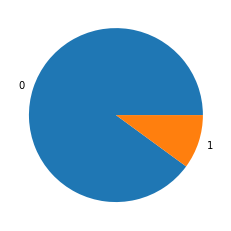

In [4]:
print(Dataset["target"].value_counts())
# plt.pie(Dataset["target"].value_counts())
# 若是選擇執行下面這一行而非上面這一行，將看到 label name
plt.pie(Dataset["target"].value_counts(), labels=["0", "1"])
plt.show()

剩下的欄位(var_1 ～ var_199)

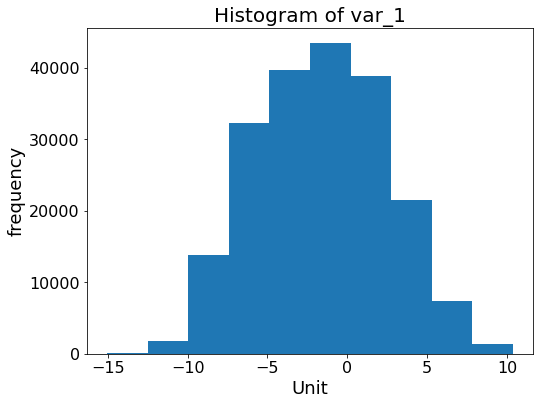

In [5]:
# 提示：Dataset["var_1"]

plt.figure(figsize=(8,6))
plt.hist(Dataset["var_1"], bins=10)
plt.title("Histogram of var_1", fontsize=20)
plt.xlabel("Unit", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

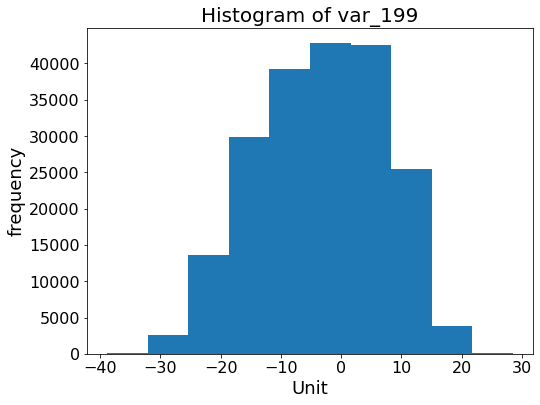

In [6]:
# 提示：Dataset["var_199"]

plt.figure(figsize=(8,6))
plt.hist(Dataset["var_199"], bins=10)
plt.title("Histogram of var_199", fontsize=20)
plt.xlabel("Unit", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# 3.辨識數值型與類別型特徵

In [7]:
numerical_attributes = []
categorical_attributes = []

for col in Dataset.columns:

  col_type = Dataset[col].dtype
  # print(col_type)
  # 如果 col_type 是 int64 或是 float64，則 ...
  if col_type == "int64" or col_type == "float64":
    numerical_attributes.append(col)
  # 如果 col_type 是 object，則 ...
  elif col_type == "object":
    categorical_attributes.append(col)

# 待會要針對 X 做 Feature Scaling，所以先把 Y 拿掉
numerical_attributes.remove("target")
  
print(f"數值型的欄位有:{numerical_attributes}")
print(f"類別型的欄位有{categorical_attributes}")

數值型的欄位有:['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99', '

# 4.進行資料切分

In [8]:
# 區分 X 與 Y
Y = Dataset["target"]
X= Dataset.drop(["target"], axis=1)

# 進行資料切分
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2)

print(f"訓練資料集(X) {X_train.shape}")
print(f"訓練資料集(Y) {Y_train.shape}")
print(f"驗證(/開發)資料集(X) {X_dev.shape}")
print(f"驗證(/開發)資料集(Y) {Y_dev.shape}")

訓練資料集(X) (160000, 200)
訓練資料集(Y) (160000,)
驗證(/開發)資料集(X) (40000, 200)
驗證(/開發)資料集(Y) (40000,)


# 5.進行 Feature Scaling

In [9]:
# 取出 訓練與驗證資料集的 數值型資料
X_train_numerical = X_train[numerical_attributes]
X_dev_numerical = X_dev[numerical_attributes]

# 使用 訓練資料集 fit
x_scaler = StandardScaler().fit(X_train_numerical)

# 使用 scaler 對 訓練資料集 與 驗證資料集 transform
X_train_trans = x_scaler.transform(X_train_numerical)
X_dev_trans = x_scaler.transform(X_dev_numerical)

# 對欄位進行覆寫 （針對 X）
X_train[numerical_attributes] = X_train_trans
X_dev[numerical_attributes] = X_dev_trans

# 後續 fit 使用 X_train 與 Y_train
# 後續 predict 使用 X_dev 與 Y_dev

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

# 6.訓練（擬合）第一個分類模型

預設模型為：隨機森林

In [10]:
# 引入這部份會使用到的套件，可以使用任何的分類模型，在此預設第一個分類模型是 Random Forest
RF_Algorithm = RandomForestClassifier(n_estimators=100)
tic = time()
RF_Model = RF_Algorithm.fit(X_train, Y_train)
toc = time()
print(f"擬合過程所花費時間為 {round(toc-tic)} (sec))")

擬合過程所花費時間為 509 (sec))


# 7.進行第一個模型的預測與評估

In [11]:
# 預測(類別)
tic = time()
RF_Predictions = RF_Model.predict(X_dev)
toc = time()
print(f"預測「類別」所花費時間為 {round(toc-tic)} (sec)")

# 分類模型表現(Note: RF_Predictions 為「預測的類別」，因此使用的是預設的 Threshold)
print(f"準確率(Accuracy)為：{round(accuracy_score(Y_dev, RF_Predictions)*100, 2)} %")
print(f"精確率(precision)為：{round(precision_score(Y_dev, RF_Predictions, pos_label=1)*100, 2)} %")
print(f"召回率(recall)為：{round(recall_score(Y_dev, RF_Predictions, pos_label=1)*100, 2)} %")
print(f"F1分數(F1-Score): {round(f1_score(Y_dev, RF_Predictions, pos_label=1)*100, 2)} %")

# 提示：
# 執行此格程式碼將發現 
# F1 Score, Recall, Precision 相當極端, Accuracy 有約 90% 的表現
# 原因是這個 Dataset 本身是不平衡的(Imbalanced)，多數資料為陰性，
# 因此判斷不能單純使用 RF_Predictions (利用預設的 Threshold = 0.5 取得判斷結果)
# 需要自行設定 Threshold

預測「類別」所花費時間為 2 (sec)
準確率(Accuracy)為：90.14 %
精確率(precision)為：100.0 %
召回率(recall)為：0.08 %
F1分數(F1-Score): 0.15 %


In [12]:
# 設定 Threshold
Threshold = 0.2
print(f"將 Threshold 調整成 {Threshold} (大於此值為陽性 1 ，反之為陰性 0 )\n")

將 Threshold 調整成 0.2 (大於此值為陽性 1 ，反之為陰性 0 )



In [13]:
# 預測(機率)
tic = time()
RF_Predictions_Proba = RF_Model.predict_proba(X_dev)
toc = time()
print(f"預測「機率」所花費時間為 {round(toc-tic)} (sec)\n")

# 取出預測為陽性的機率
RF_Positive_Proba = RF_Predictions_Proba[:,1]
RF_Decision = (RF_Positive_Proba > Threshold).astype(int)

# 分類模型表現(Note: 我們有使用的是自定義的 Threshold，才得到 RF_Decision)
print(f"準確率(Accuracy)為：{round(accuracy_score(Y_dev, RF_Decision)*100, 2)} %")
print(f"精確率(precision)為：{round(precision_score(Y_dev, RF_Decision, pos_label=1)*100, 2)}")
print(f"召回率(recall)為：{round(recall_score(Y_dev, RF_Decision, pos_label=1)*100, 2)}")
print(f"F1分數(F1-Score): {round(f1_score(Y_dev, RF_Decision, pos_label=1)*100, 2)} %")

預測「機率」所花費時間為 2 (sec)

準確率(Accuracy)為：88.36 %
精確率(precision)為：41.54
召回率(recall)為：44.06
F1分數(F1-Score): 42.76 %


# 8.訓練（擬合）第二個分類模型

預設模型：K-Nearest Neighbor

In [14]:
# 建議將 n_neighbor 的值設大於 100 
# 引入這部份會使用到的套件，可以使用任何的分類模型，在此預設第二個分類模型是 KNN
KNN_Algorithm = KNeighborsClassifier(n_neighbors=100)
KNN_Model = KNN_Algorithm.fit(X_train, Y_train)

# 9.進行第二個模型的預測與評估

指標包含：accuracy, precision, recall, f1-score

In [15]:
# 預測(類別)
tic = time()
KNN_Predictions = KNN_Model.predict(X_dev)
toc = time()
print(f"預測「類別」所花費時間為 {round(toc-tic)} (sec)")

# 分類模型表現(Note: KNN_Predictions 為「預測的類別」，因此使用的是預設的 Threshold)
print(f"準確率(Accuracy)為：{round(accuracy_score(Y_dev, KNN_Predictions)*100, 2)} %")
print(f"精確率(precision)為：{round(precision_score(Y_dev, KNN_Predictions, pos_label=1)*100, 2)} %")
print(f"召回率(recall)為：{round(recall_score(Y_dev, KNN_Predictions, pos_label=1)*100, 2)} %")
print(f"F1分數(F1-Score): {round(f1_score(Y_dev, KNN_Predictions, pos_label=1)*100, 2)} %")

# 提示：
# 執行此格程式碼將發現 
# F1 Score, Recall, Precision 相當極端, Accuracy 有約 90% 的表現
# 原因是這個 Dataset 本身是不平衡的(Imbalanced)，多數資料為陰性，
# 因此判斷不能單純使用 RF_Predictions (利用預設的 Threshold = 0.5 取得判斷結果)
# 需要自行設定 Threshold

預測「類別」所花費時間為 3859 (sec)
準確率(Accuracy)為：90.13 %
精確率(precision)為：0.0 %
召回率(recall)為：0.0 %
F1分數(F1-Score): 0.0 %


C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 預測(機率)
tic = time()
KNN_Predictions_Proba = KNN_Model.predict_proba(X_dev)
toc = time()
print(f"預測「機率」所花費時間為 {round(toc-tic)} (sec)\n")

In [ ]:
# 設定 Threshold
Threshold = 0.05
print(f"將 Threshold 調整成 {Threshold} (大於此值為陽性 1 ，反之為陰性 0 )\n")

# 取出預測為陽性的機率
KNN_Positive_Proba = KNN_Predictions_Proba[:,1]
KNN_Decision = (KNN_Positive_Proba > Threshold).astype(int)

# 分類模型表現(Note: 我們有使用的是自定義的 Threshold，才得到 KNN_Decision)
print(f"準確率(Accuracy)為：{round(accuracy_score(Y_dev, KNN_Decision)*100, 2)} %")
print(f"精確率(precision)為：{round(precision_score(Y_dev, KNN_Decision, pos_label=1)*100, 2)}")
print(f"召回率(recall)為：{round(recall_score(Y_dev, KNN_Decision, pos_label=1)*100, 2)}")
print(f"F1分數(F1-Score): {round(f1_score(Y_dev, KNN_Decision, pos_label=1)*100, 2)} %")

# 10.兩模型比較(AUC)

先繪製 ROC 曲線（ROC Curve），再計算曲線下面積(AUC)

In [ ]:
# 引入此部份所需套件
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 第一個模型
RF_fpr, RF_tpr, RF_thresholds = roc_curve(Y_dev, RF_Positive_Proba, pos_label=1)
RF_AUC = auc(RF_fpr, RF_tpr)

# 第二個模型
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(Y_dev, KNN_Positive_Proba, pos_label=1)
KNN_AUC = auc(KNN_fpr, KNN_tpr)

# 繪製 ROC Curve
plt.figure(figsize=(6,6))
plt.plot(RF_fpr, RF_tpr, label=f"RF AUC={round(RF_AUC,3)}")
plt.plot(KNN_fpr, KNN_tpr, label=f"KNN AUC={round(KNN_AUC,3)}")
plt.title("ROC Curve (RF vs. KNN)", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

由 AUC，得到以下結論：
使用隨機森林演算法所找到的模型比使用KNN演算法所找到的模型好